##### Train model to predict images of digits using CLASSIC 2-Layer model and L-layer models.
- These models were built without using any TensorFlow / Pytouch.

In [1]:
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
from keras.utils import to_categorical # convert your class labels into one-hot encoded vectors,

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  

In [3]:

print ("Number of training examples: " + str(train_images.shape[0]) + " images")
print ("Number of testing examples: " + str(test_images.shape[0]) + " images")
print ("Each image is of size: (" + str(train_images.shape[1]) + ", " + str(train_images.shape[1]) + ", 3)")

print("-------------------------------------")
print("train_images shape: " + str(train_images.shape))
print("train_labels shape: " + str(train_labels.shape))
print("test_images shape: " + str(test_images.shape))
print("test_labels shape: " + str(test_labels.shape))

Number of training examples: 60000 images
Number of testing examples: 10000 images
Each image is of size: (28, 28, 3)
-------------------------------------
train_images shape: (60000, 28, 28)
train_labels shape: (60000,)
test_images shape: (10000, 28, 28)
test_labels shape: (10000,)


In [4]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [5]:
# Check output classes
total_classes = np.unique(train_labels)
number_of_total_classes = len(total_classes)
print('Total number of output classes : ', number_of_total_classes)
print('All Output classes : ', total_classes)

Total number of output classes :  10
All Output classes :  [0 1 2 3 4 5 6 7 8 9]


- From the above result: we got 10 distinct classes, so we will use **Categorical cross-entropy** as our Loss function later on.

#### Binary cross-entropy vs Categorical cross-entropy loss functions
- **Binary CE (Sigmoid):** Binary Classification (2 classes only)
    - Example usage: Classifying images of "spam" or "not spam" labels  or whether an image is of a "cat" or "dog".
    
$$\text{Binary Cross-Entropy} = - \left[ y \log(p) + (1 - y) \log(1 - p) \right]$$

- where:
    - $p =$ true label $∈{0,1}$
    - $p =$ predicted probability of class 1 (e.g "spam").
    - It is Bernoulli target:
        - if $p > 0.5$, model predicts as spam (class 1)
        - if $p < 0.5$, model predicts as not spam (class 0)
        - Output neuron: one only.

- **Categorical CE (Softmax):** Multi-class Classification (more than 2 classes)
    - Example usage: classifying image of "cat", "dog", and "bird" or digit classification (0 - 9).
    - Exactly one class is true among $C$ classes
    - Output neurons: number of $C$ classes

$$\text{Categorical Cross-Entropy} = - \sum_{i=1}^{C} y_i \log(p_i)$$

- where:
    - $C =$ number of class
    - $y_i =$ true label in one-hot encoded vector (0 or 1).
    - $p_i =$ predicted probability of class i.


Text(0.5, 1.0, 'Label : 2')

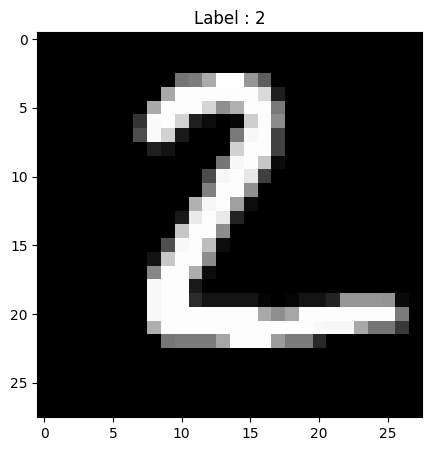

In [6]:
# Display the first image in testing data 
plt.figure(figsize=[10,5])

plt.imshow(test_images[1,:,:], cmap='gray') # shows index 1 image of size 28 x 28 pixels 
plt.title(f"Label : {test_labels[1]}")

#### Data Preprocessing: 

- In order for Dense layer to work, it expects a **2D array**.
- Since our test & test images shape is 3D array (60000, 28, 28), we will need to convert them into 2D array of (6000, 28*28).

In [7]:
# Resahpe from an array of dimension 28x28 to array of dimention 784 so that it becomes 2D array. 
train_x = train_images.reshape(train_images.shape[0], -1) # -1 will automatically be calculated into 28 * 28
test_x = test_images.reshape(test_images.shape[0], -1)

# Standardize data to have feature values between 0 and 1. (255 is max pixel value for 8-bit image)
train_x = train_x/255.
test_x = test_x/255.

# Change to float datatype
train_data = train_x.astype('float32')
test_data = test_x.astype('float32')

print(train_x.shape)
print(test_x.shape)

(60000, 784)
(10000, 784)


In [8]:
### Another way to flatten shape:
# reshape = np.prod(train_images.shape[1:])  # = np.prod([28, 28]) = 784
# train_data = train_images.reshape(train_images.shape[0], reshape)
# test_data = test_images.reshape|(test_images.shape[0], reshape)

In [9]:
# One-hot encoded labels (for multiple classes (0 - 9))
train_y = to_categorical(train_labels)
test_y = to_categorical(test_labels)

- In order to let our image be idenified and classified, we need to convert numeric labels into binary vectors (one-hot encoded):
- Exmaple:
    - label `3` becomes `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`.
    - label `0` becomes `[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]`.
    - Label `7` → `[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]`.

#### Build Model: **2-Layer Model**

- It is an architecture of `LINEAR → RELU → LINEAR → SOFTMAX`.

- Linear activation function `f(x)=x`: output is directly proportional to the input. (output is same as input).

- RELU (Rectified Linear Unit) `f(x)=max(0,x)`: It is a non-linear activation function that transforms any nagtive input to 0. 

- SOFTMAX FORMULA: $$f(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{C} e^{x_j}}$$


- It is a non-linear activation function that output probability distribution over multiple classes.
    - Example (4-class (digits 0 - 3) problem):
        - The probability of class 0 = 0.4
        - The probability of class 1 = 0.2
        - The probability of class 2 = 0.3
        - The probability of class 3 = 0.1
            - The output probability will be **class 0** since its the highest. 
            - The sum of all probability will be equal to 1.

- **Required Steps:**
    - Initialize parameters
        - weight (how important a feature is) and bias (baseline).

    - Forward pass to compute activations at each layer: 
        - Linear transformation: $Z = W * A + b$.
            - where:
                - $Z$: Output of linear transformation.
                - $W$: Weights.
                - $A$: Activations from previous layer.
                - $b$: bias term.
        - Activation functions (ReLU and Softmax): 
            - 1st linear transformation: apply ReLU (outputs values that is always non-nagative)
            - 2nd linear transformation: apply Softmax (multi-class classification)

    - Compute cost (Categorical Cross-Entropy Loss formula)
        - Formula is defined as: $- \frac{1}{m} \sum Y \log(A)$
        - Compares predicted outputs (A2) with actual labels (Y).
        - Lower cost = Model's prediction closer to actual labels =  higher accuracy.

    - Backward pass to compute gradients.
        - Uses Backpropagation (based on the Calculus Chain Rule) to calculate how much each weight and bias contributed to the error.

    - Update parameters.
        - Adjusts $W$ and $b$ by subtracting a small portion (learning rate) of the gradients.

    - Repeat for a number of iterations (Epochs) 
        - This iterative process of moving toward the lowest cost is called **gradient descent.**

#### Binary cross-entropy vs Categorical cross-entropy loss functions
- **Binary CE (Sigmoid):** Binary Classification (2 classes only)
    - Example usage: Classifying images of "spam" or "not spam" labels  or whether an image is of a "cat" or "dog".
    
$$\text{Binary Cross-Entropy} = - \left[ y \log(p) + (1 - y) \log(1 - p) \right]$$

- where:
    - $p =$ true label $∈{0,1}$
    - $p =$ predicted probability of class 1 (e.g "spam").
    - It is Bernoulli target:
        - if $p > 0.5$, model predicts as spam (class 1)
        - if $p < 0.5$, model predicts as not spam (class 0)
        - Output neuron: one only.

- **Categorical CE (Softmax):** Multi-class Classification (more than 2 classes)
    - Example usage: classifying image of "cat", "dog", and "bird" or digit classification (0 - 9).
    - Exactly one class is true among $C$ classes
    - Output neurons: number of $C$ classes

$$\text{Categorical Cross-Entropy} = - \sum_{i=1}^{C} y_i \log(p_i)$$

- where:
    - $C =$ number of class
    - $y_i =$ true label in one-hot encoded vector (0 or 1).
    - $p_i =$ predicted probability of class i.


- Define the layers:
    - Input layer `(n_x)`: The number of input features (784).

    - Hidden layer `(n_h)`: The number of hidden neurons in the hidden layer (128).
        - Numbers can be `32, 64, 128, 256`. 
        - If we give too high number of neurons (256 etc), then model may **overfit**.

    - Output layer `(n_y)`: The number of output neurons (10) since we have 10 digits (0 - 9).

In [10]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(7)  # For reproducibility
    
    # Initialize weights and biases for the layers
    W1 = np.random.randn(n_h, n_x) * 0.01  # Weight for the first layer (size: n_h x n_x)
    b1 = np.zeros((n_h, 1))  # Bias for the first layer (size: n_h x 1)
    
    W2 = np.random.randn(n_y, n_h) * 0.01  # Weight for the second layer (size: n_y x n_h)
    b2 = np.zeros((n_y, 1))  # Bias for the second layer (size: n_y x 1)
    
    # Store parameters in a dictionary to return
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters

In [11]:
def linear_activation_forward(A_prev, W, b, activation):
    # Compute the linear part (Z = W.A_prev + b)
    Z = np.dot(W, A_prev) + b
    
    if activation == "relu":
        A = np.maximum(0, Z)  # ReLU activation function
    elif activation == "softmax":
        # Shift Z by subtracting the max value to prevent overflow (numerical stability)
        Z_exp = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # Avoid overflow
        A = Z_exp / np.sum(Z_exp, axis=0, keepdims=True)  # Normalize to get probabilities

    cache = (A_prev, W, b, Z)
    
    return A, cache

In [12]:
# Categorical Cross-Entropy Loss (dealing with more than 2 classes (0 - 9))
def compute_cost(AL, Y):
    m = Y.shape[1] # 6000 because train_y is (10, 60000) after transpose. 
    cost = - (1 / m) * np.sum(Y * np.log(AL + 1e-8)) # Added epsilon to avoid log(0)
    return cost


In [13]:
def linear_activation_backward(dA, cache, activation):
    A_prev, W, b, Z = cache
    
    m = A_prev.shape[1]  # Number of training examples
    
    if activation == "relu":
        # Derivative of ReLU
        dZ = dA.copy()
        dZ[Z <= 0] = 0
    elif activation == "softmax":
        dZ = dA # dA already AL - Y
    
    dW = (1 / m) * np.dot(dZ, A_prev.T)  # Gradient of the weights
    db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)  # Gradient of the biases
    dA_prev = np.dot(W.T, dZ)  # Gradient for the previous activation
    
    return dA_prev, dW, db


In [14]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    for l in range(1, L + 1):
        parameters[f"W{l}"] -= learning_rate * grads[f"dW{l}"]
        parameters[f"b{l}"] -= learning_rate * grads[f"db{l}"]
    
    return parameters


In [15]:
# Ensure that train_y is correct shape of (10, m): 
train_y = train_y.T

Epoch 0: cost = 2.3038466115972853
Epoch 50: cost = 1.9972929138669013
Epoch 100: cost = 0.9513913514018804
Epoch 150: cost = 0.6253845392081833
Epoch 200: cost = 0.5056564572577448
Epoch 250: cost = 0.44419333645563613
Epoch 300: cost = 0.4070254300891131
Epoch 350: cost = 0.38207504387233326
Epoch 400: cost = 0.36390478057382186
Epoch 450: cost = 0.3497796041561059


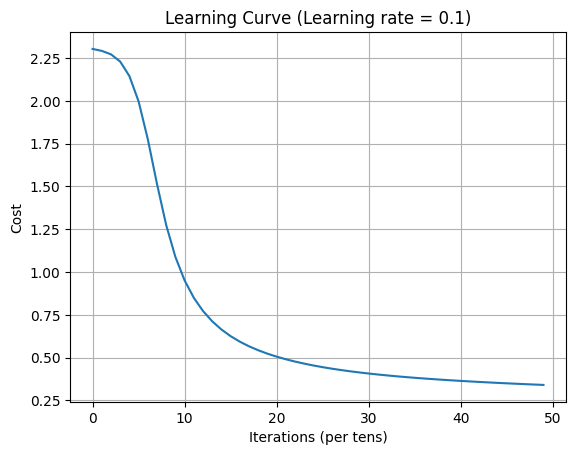

In [18]:
# Initialize parameters
n_x = 784  # Input layer size (28 * 28)
n_h = 128  # Hidden layer size (too big = overfit, too small = underfit)
n_y = 10    # Output layer size (binary classification)

# Get W1, b1, W2 and b2 from parameters:
parameters = initialize_parameters(n_x, n_h, n_y)

# Training loop
learning_rate = 0.1
num_epochs = 500
costs = [] # <- For graph represntation later

for epoch in range(num_epochs):
    # Forward pass
    A1, cache1 = linear_activation_forward(train_x.T, parameters["W1"], parameters["b1"], activation="relu")
    A2, cache2 = linear_activation_forward(A1, parameters["W2"], parameters["b2"], activation="softmax")
    
    # Compute cost
    cost = compute_cost(A2, train_y)

  
    # Initializing backward propagation
    dA2 = A2 - train_y

    dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = "softmax")
    dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")
    
    grads = {
    "dW1": dW1,
    "db1": db1,
    "dW2": dW2,
    "db2": db2
    }
    
    # Update parameters
    parameters = update_parameters(parameters, grads, learning_rate)
    
    # Add cost to list for every 10 epochs 
    if epoch % 10 == 0:
        costs.append(cost)

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: cost = {cost}")

# Plot graph:
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations (per tens)')
plt.title(f"Learning Curve (Learning rate = {learning_rate})")
plt.grid(True)
plt.show()


#### Testing model's prediction

In [19]:
train_y.shape

(10, 60000)

In [20]:
def predict(X, y, parameters):
    """
    X: (m, 784)
    y: (10, m)
    parameters: Trained W1, b1, W2, b2 
    """
    X = X.T # (784, m)
    
    # 1. Forward pass to get probabilities (A2)
    A1, _ = linear_activation_forward(X, parameters["W1"], parameters["b1"], activation="relu")
    A2, _ = linear_activation_forward(A1, parameters["W2"], parameters["b2"], activation="softmax")
    
    # 2. Convert probabilities to class labels (0-9)
    # axis=0 because A2 is (10, m). It picks the row index with highest value for each example.
    predictions = np.argmax(A2, axis=0)
    
    # 3. Convert one-hot ground truth labels back to digits for comparison
    true_labels = np.argmax(y, axis=0)
    
    # 4. Calculate accuracy
    accuracy = np.mean(predictions == true_labels)
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    return predictions

In [21]:
print("--- Training Accuracy ---")
p_train = predict(train_x, train_y, parameters)

print("\n--- Test Accuracy ---")
p_test = predict(test_x, test_y.T, parameters)

--- Training Accuracy ---
Accuracy: 90.45%

--- Test Accuracy ---
Accuracy: 90.71%


- Based on the results above, the model has learned the actual patterns of the digits rather than just memorizing the training images. Both accuracy is at about 90.5%, which indicates **moderate bias** (decent generalization at capturing basic patterns of the digit images).

- Possible Improvements:
    - Increase the Epouch (from 500 to 1000) and hiddden layer size(from 128 to 256).
    - Decrease learning rate size (from 0.1 to 0.001) to hit the minimum cost as low as possble.
    - Add a 3rd layer (input -> hidden 1 -> hidden 2 -> output).
    - Build L-Layer model.

#### Building L-Layer Model
- $[LINEAR -> RELU]\times(L-1) -> LINEAR -> SOFTMAX$
    - where:
        - $L$: Total number of layers
        - $L-1$: Total number of Hidden layers


- Example usage:
    - If L = 5 layers (L-1 = 4 hidden layers), 

        - Hidden Layer 1: [LINEAR -> RELU]

        - Hidden Layer 2: [LINEAR -> RELU]

        - Hidden Layer 3: [LINEAR -> RELU]
        
        - Hidden Layer 4: [LINEAR -> RELU]
        - Output Layer: LINEAR -> SOFTMAX

In [22]:
def initialize_parameters_deep(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # 5 total layers

    for l in range(1, L):
        # He Initialization (recommended for ReLU)
        parameters[f"W{l}"] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2/layer_dims[l-1])
        parameters[f"b{l}"] = np.zeros((layer_dims[l], 1))
        
    return parameters

In [23]:
def L_model_forward(X, parameters): # X = (n_x, m)
    caches = []
    A = X
    L = len(parameters) // 2 # number of Hidden layers
    
    # [LINEAR -> RELU] * (L-1)
    for l in range(1, L):
        A_prev = A # passes activation forward layer by layer
        A, cache = linear_activation_forward(A_prev, parameters[f"W{l}"], parameters[f"b{l}"], activation="relu")
        caches.append(cache)
    
    # LINEAR -> SOFTMAX (Output Layer - "L" is used for final layer)
    AL, cache = linear_activation_forward(A, parameters[f"W{L}"], parameters[f"b{L}"], activation="softmax")
    caches.append(cache)
            
    return AL, caches

In [24]:
def L_model_backward(AL, Y, caches): # AL, Y = (n_y, m)
    grads = {}
    L = len(caches) # number of layers
    m = Y.shape[1]
    
    # softmax + categorical cross-entropy gradient
    dA3 = AL - Y # (n_y, m)
    
    # Last layer (softmax):
    dA_prev, dW, db = linear_activation_backward(dA3, caches[L-1], activation="softmax")
    grads[f"dW{L}"] = dW
    grads[f"db{L}"] = db
    
    # Hidden layers: RELU backward
    for l in reversed(range(1, L)):
        dA_prev, dW, db = linear_activation_backward(dA_prev, caches[l-1], activation="relu")
        grads[f"dW{l}"] = dW
        grads[f"db{l}"] = db

    return grads

In [25]:
layers_dims = [784, 256, 128, 64, 10] # 5-layer model
"""
1st element (784): (28 * 28) image dimensions
2nd element (256): first hidden layer
3rd element (128): second hidden layer
4th element (64): third hidden layer
5th element (10): output layer (0 - 9)
"""

def L_layer_model(X, Y, layers_dims, learning_rate, num_iterations):
    parameters = initialize_parameters_deep(layers_dims)
    costs = []
    
    for i in range(num_iterations):
        # Forward propagation
        AL, caches = L_model_forward(X.T, parameters)
        
        # Compute cost
        cost = compute_cost(AL, train_y)
        
        # Backward propagation
        grads = L_model_backward(AL, Y, caches)
        
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")
            costs.append(cost)
            
    return parameters, costs

# Run training
parameters, costs = L_layer_model(train_x, train_y, layers_dims,  learning_rate = 0.075, num_iterations=1000)

Cost after iteration 0: 2.3767629544153444
Cost after iteration 100: 0.394910222839197
Cost after iteration 200: 0.2864972014669313
Cost after iteration 300: 0.24215619002167255
Cost after iteration 400: 0.21241547680159442
Cost after iteration 500: 0.1899531141552465
Cost after iteration 600: 0.17208694013348663
Cost after iteration 700: 0.15726572072215694
Cost after iteration 800: 0.1447178062706548
Cost after iteration 900: 0.1339679714498261


In [26]:
# L-Model Prediction:
def predict(X, y, parameters):
    X = X.T # (784, m)
    
    # 1. Use the generalized Forward Pass function
    # This automatically handles as many layers as are in your parameters dict
    # AL will be the output of the very last (sigmoid) layer
    AL, _ = L_model_forward(X, parameters)
    
    # 2. Convert probabilities to class labels (0-9)
    # axis=0 because AL shape is (m, 10)
    predictions = np.argmax(AL, axis=0)
    
    # 3. Convert one-hot ground truth labels back to digits for comparison
    # train_y/test_y are (10, m), so we check axis 0
    true_labels = np.argmax(y, axis=0)
    
    # 4. Calculate accuracy
    accuracy = np.mean(predictions == true_labels)
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    return predictions

In [27]:
# Assuming your layers_dims was [784, 128, 64, 10]
print("--- L-layer Model Training Accuracy ---")
p_train = predict(train_x, train_y, parameters)

print("\n--- L-layer Model Test Accuracy ---")
p_test = predict(test_x, test_y.T, parameters)

--- L-layer Model Training Accuracy ---
Accuracy: 96.51%

--- L-layer Model Test Accuracy ---
Accuracy: 95.84%


- As you can see, L-layer model has higher test accuracy (95.84%) than 2-layer model of about 5-6% increment.

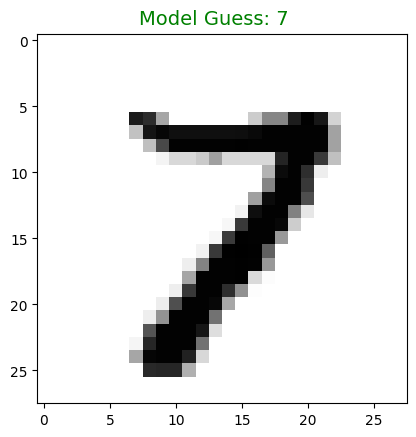

In [32]:
# User testing
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

def predict_single(parameters, image, correct_label):
    # 1. Preprocess the image: Flatten and Normalize
    # Reshape from (28, 28) to (784, 1) and scale to 0-1
    processed_image = image.reshape(784, 1) / 255.0
    
    # 2. Forward Pass using your manual function
    # AL will be the output layer (probabilities for each digit)
    AL, _ = L_model_forward(processed_image, parameters)
    
    # 3. Get the prediction
    prediction_index = np.argmax(AL, axis=0)[0]
    predicted_class = class_names[prediction_index]
    
    # 4. Show the result
    show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Expected: " + label)
    # Using a colored text for the prediction to make it stand out
    plt.figtext(0.5, 0.90, f"Model Guess: {guess}", ha='center', fontsize=14, 
                color='green' if label == guess else 'red')
    plt.show()

def get_number():
    while True:
        num = input("Pick a number (0-9999): ")
        if num.isdigit():
            num = int(num)
            if 0 <= num < 10000:
                return num
        print("Try again...")

# --- Execution ---
num = get_number()
image = test_images[num]   # Original 28x28 image for plotting
label = test_labels[num]   # The integer label (0-9)
predict_single(parameters, image, label)